# Exploration

This notebook provides some additional exploration of the underlying material.

## Quantitiy of interest

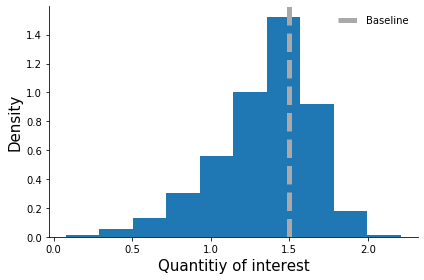

In [53]:
base_quantity = pd.read_pickle(RSLT_DIR / "basecamp/base_quantity.uq.pkl")
mc_quantity = pd.read_pickle(RSLT_DIR / "basecamp/mc_quantity.uq.pkl")

fig, ax = plt.subplots()   
ax.hist(mc_quantity.values, density=True);
ax.axvline(base_quantity.values, color="#A9A9A9", linestyle="--", label="Baseline")
ax.set_xlabel("Quantitiy of interest")
ax.set_ylabel("Density")
ax.legend()

fig.savefig(RSLT_DIR / "basecamp/fig-quantity-of-interest")

## Parameterization

We want to have a look at the underlying sampling of the paramterization.

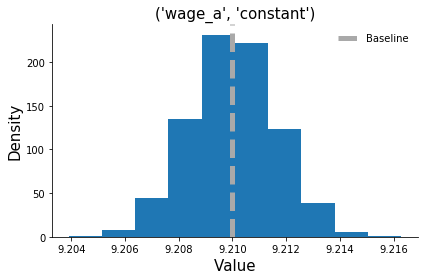

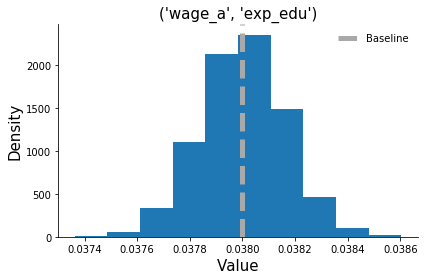

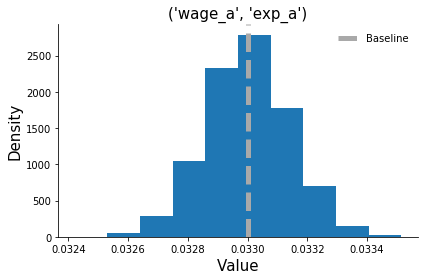

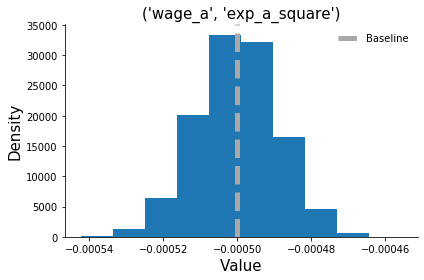

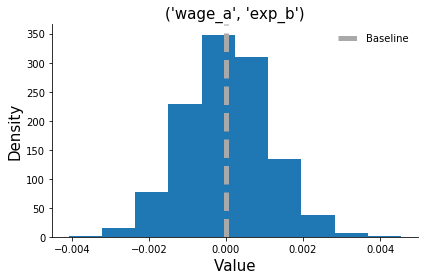

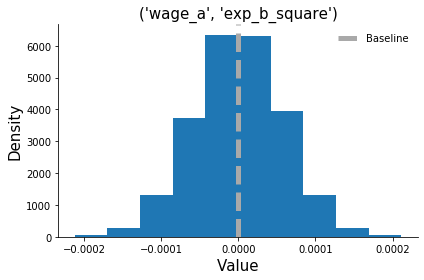

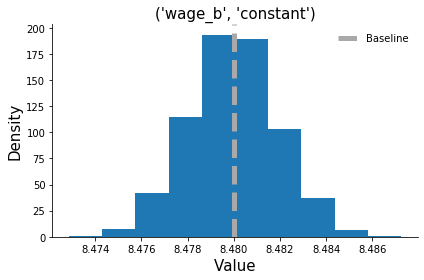

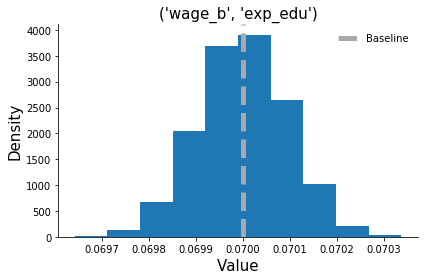

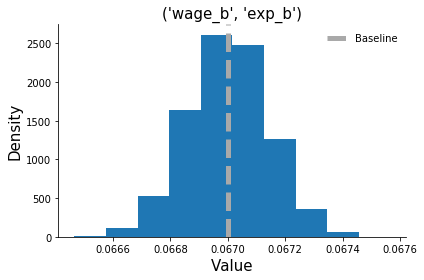

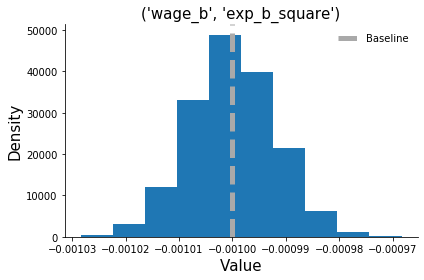

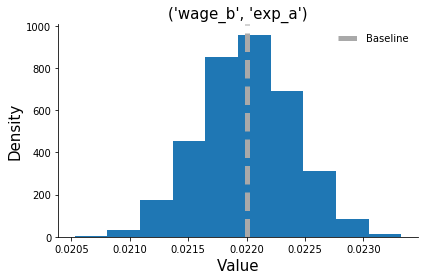

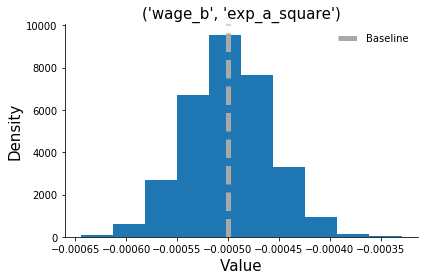

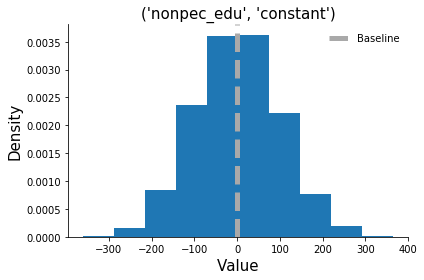

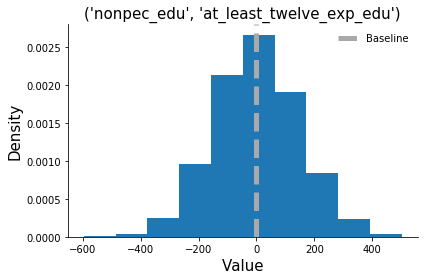

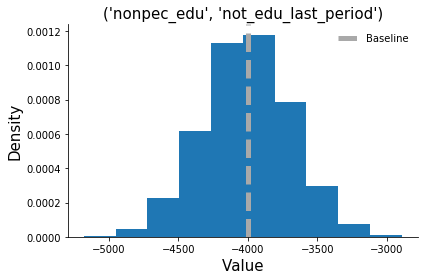

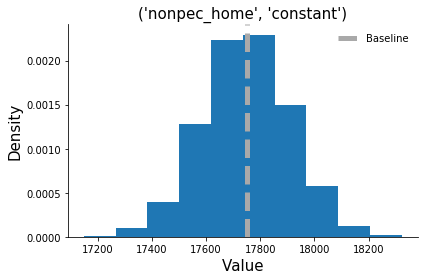

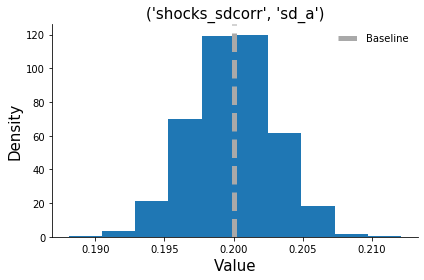

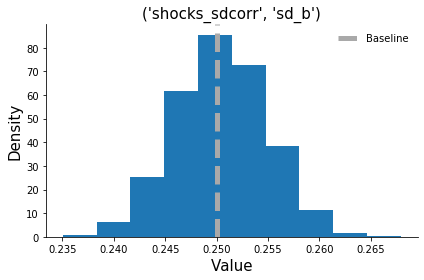

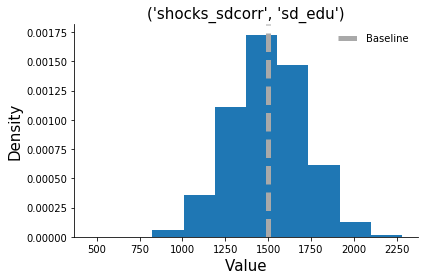

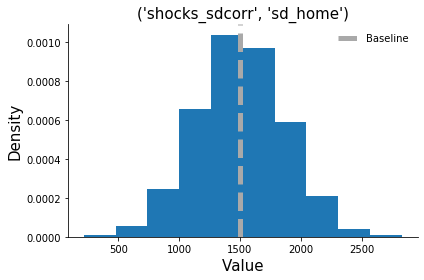

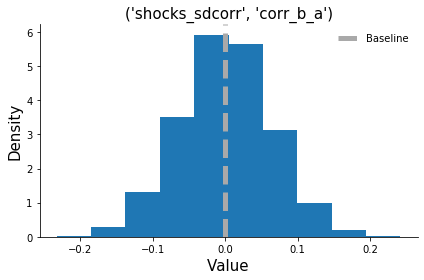

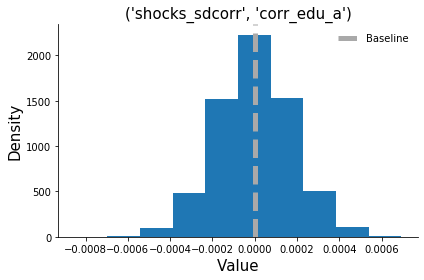

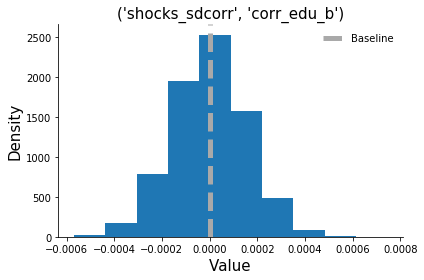

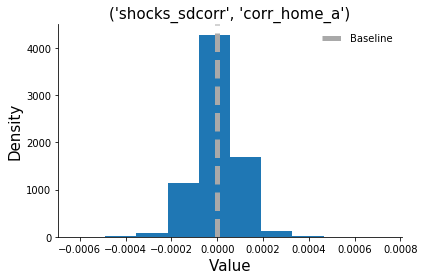

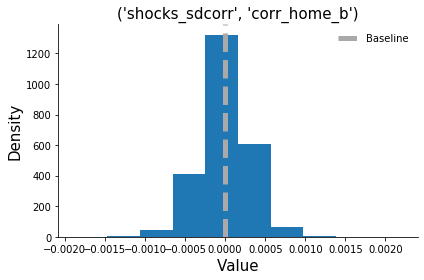

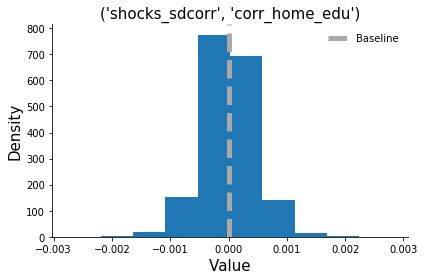

In [50]:
base_params = pd.read_pickle(RSLT_DIR / "basecamp/base_params.uq.pkl")
mc_params = pd.read_pickle(RSLT_DIR / "basecamp/mc_params.uq.pkl")

for name in mc_params.loc[0, :, :].index.droplevel():

    mc = mc_params.loc[(slice(None), *name), "value"]
    base = base_params.loc[name, "value"]
        
    # Some parameters remain fixed.
    if mc.describe()['std'] < 1e-10:
        continue
        
    fig, ax = plt.subplots()
    ax.set_title(name)
    ax.hist(mc, density=True)
    ax.axvline(base, color="#A9A9A9", linestyle="--", label="Baseline")

    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()